In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [107]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### EDA

In [108]:
# Reading the Training Data
df = pd.read_csv("/content/train_set_dirty.csv")

In [109]:
# 1. Displaying the first 10 records
df.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1493.0,NaN,287.15,0.00,0.0,90.0,Mist,NaN,18-09-2017 22:00
1,NaN,NaN,282.25,0.00,0.0,90.0,Clouds,overcast clouds,23-05-2013 11:00
2,NaN,NaN,NaN,0.00,0.0,90.0,Drizzle,drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,0.00,0.0,20.0,Haze,haze,04-01-2017 08:00
4,5357.0,NaN,291.25,1.02,0.0,NaN,Rain,moderate rain,13-06-2013 13:00


In [110]:
# 2. Check dataset info - field types, non-null values, dtypes
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,34748.000000,34754.000000,34860.000000,34733.000000,34659.000000
mean,3254.207753,281.164396,0.414656,0.000242,49.472605
std,1987.318504,13.534323,52.665546,0.008662,39.013199
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1187.000000,272.150000,0.000000,0.000000,1.000000
50%,3370.500000,282.420000,0.000000,0.000000,64.000000
75%,4931.000000,291.770000,0.000000,0.000000,90.000000
max,7280.000000,308.430000,9831.300000,0.510000,100.000000


In [111]:
df.describe(include = 'object')


,holiday,weather_main,weather_description,date_time
count,42,34654,34751,34683
unique,11,11,38,30414
top,New Years Day,Clouds,sky is clear,05-11-2017 01:00
freq,5,10938,8335,5


**We have three object columns which are categorical which are 'holiday', weather_main, weather_description and date_time**

**The number of categories that each has is 11, 11, 38 and 30414 respectively.**

**The most frequently occuring category for each feature is 'New Years Day' 'Clouds', 'sky is clear' and 5th November 2017 1:00 respectively**

In [112]:
df['holiday'].value_counts()

holiday
New Years Day                5
Columbus Day                 5
Christmas Day                5
Veterans Day                 5
Memorial Day                 4
Martin Luther King Jr Day    4
Thanksgiving Day             4
Labor Day                    3
State Fair                   3
Independence Day             2
Washingtons Birthday         2
Name: count, dtype: int64

In [113]:
df['weather_main'].value_counts()

weather_main
Clouds          10938
Clear            9556
Mist             4273
Rain             4089
Snow             2101
Drizzle          1298
Haze              994
Thunderstorm      716
Fog               670
Smoke              17
Squall              2
Name: count, dtype: int64

In [114]:
df['weather_description'].value_counts()

weather_description
sky is clear                           8335
mist                                   4339
overcast clouds                        3702
broken clouds                          3318
scattered clouds                       2496
light rain                             2414
few clouds                             1423
light snow                             1396
Sky is Clear                           1238
moderate rain                          1230
haze                                    993
light intensity drizzle                 744
fog                                     661
proximity thunderstorm                  487
drizzle                                 478
heavy snow                              457
heavy intensity rain                    341
snow                                    221
proximity shower rain                   105
thunderstorm                             82
heavy intensity drizzle                  50
thunderstorm with heavy rain             45
proximity th

In [115]:
df['date_time'].value_counts()

date_time
05-11-2017 01:00    5
14-04-2018 09:00    5
19-05-2013 08:00    5
21-05-2013 23:00    5
20-03-2018 14:00    5
                   ..
29-08-2013 21:00    1
04-02-2013 16:00    1
04-01-2016 21:00    1
26-03-2018 00:00    1
01-05-2013 04:00    1
Name: count, Length: 30414, dtype: int64

**Inference from the above Dataset**
- Each column has close to 10% of null values with the exception of Holidays
- Holidays are mentioned only in 37 rows of the dataset. Rest are as NaN values
- weather_main has enough information of the weather condition
- date_time column could be converted to the pandas- pd.DateTime object to analyse the hours from the datetime.
- rain and snow features being seasonal, majority of data have 0 values, and hence would not relevant for the final model

### Univariate  Analysis

**Let us further explore the data distribution of each of the 4 numerical features plus the target of the data 'traffic_volume'**

array([[<Axes: title={'center': 'traffic_volume'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'rain_1h'}>,
        <Axes: title={'center': 'snow_1h'}>],
       [<Axes: title={'center': 'clouds_all'}>, <Axes: >]], dtype=object)

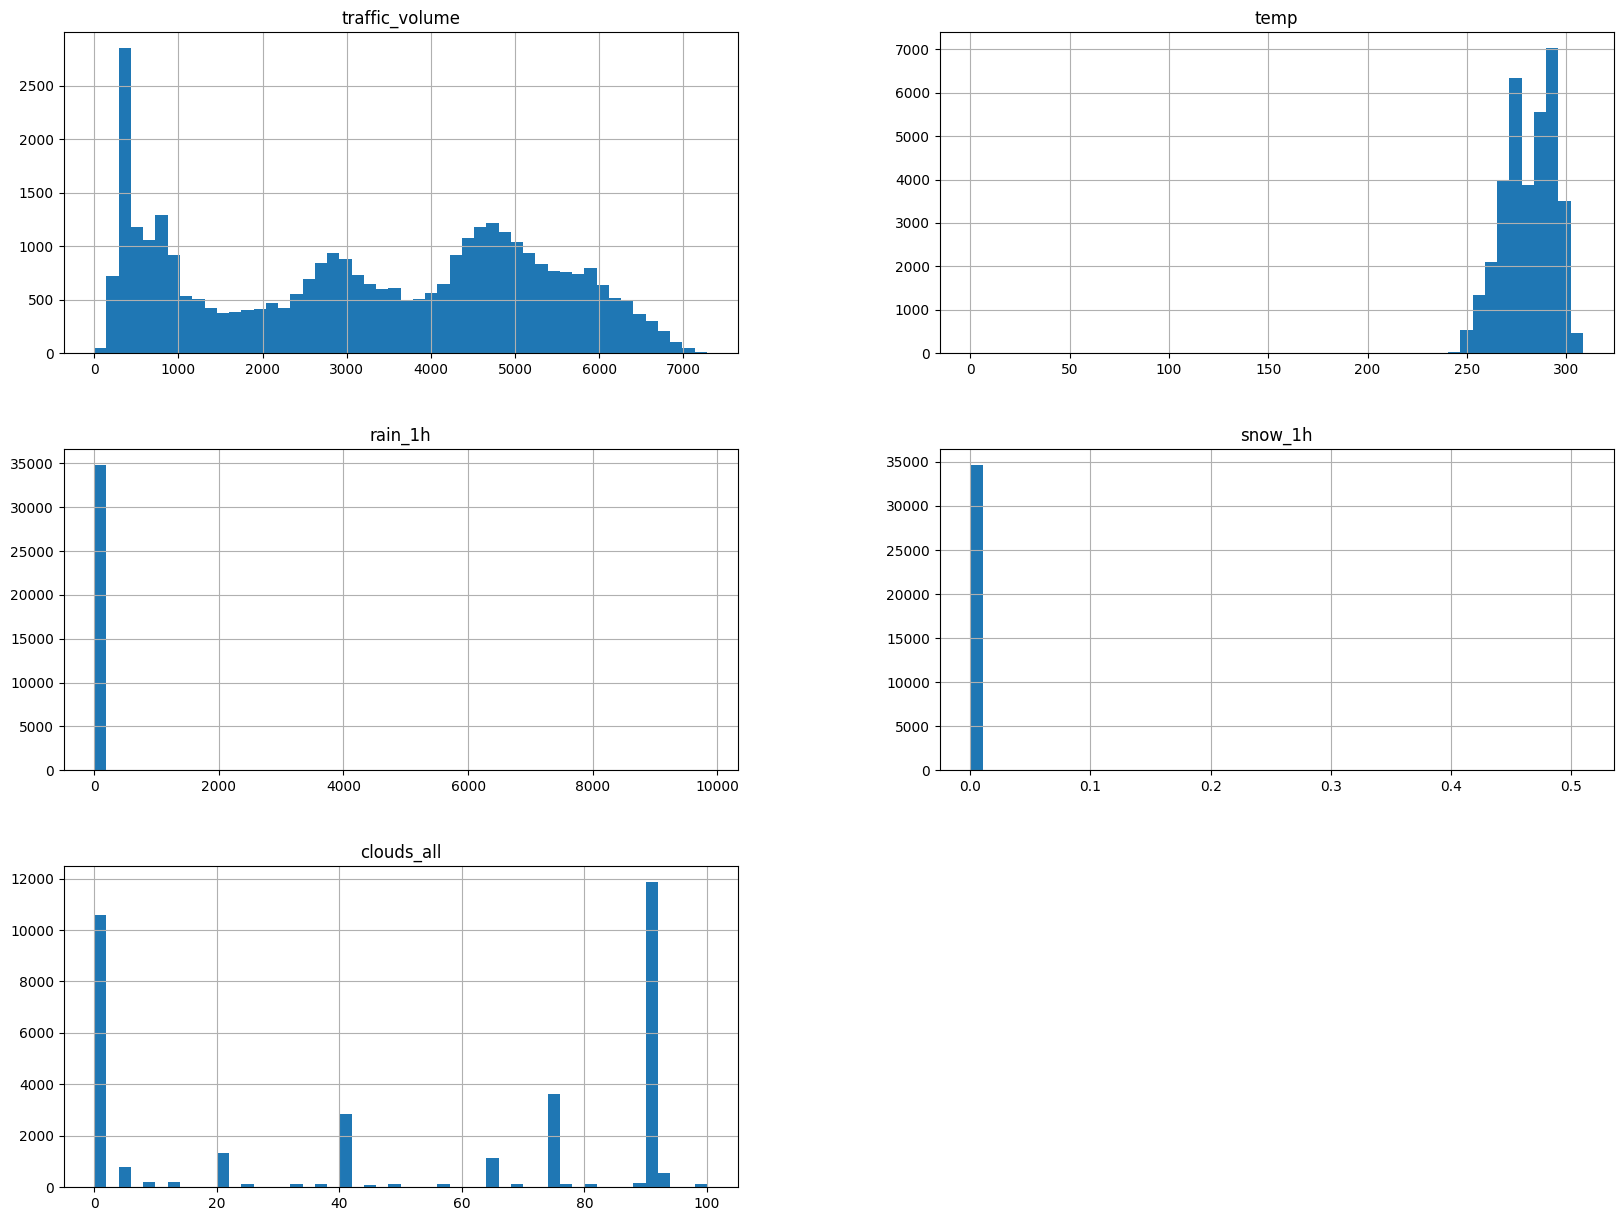

In [116]:

df.hist(bins=50, figsize=(20,15))
plt.show()

**We can clearly see from the above graphs, there is poor representation of rain_1h and snow_1h in the dataset**

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='count', ylabel='holiday'>

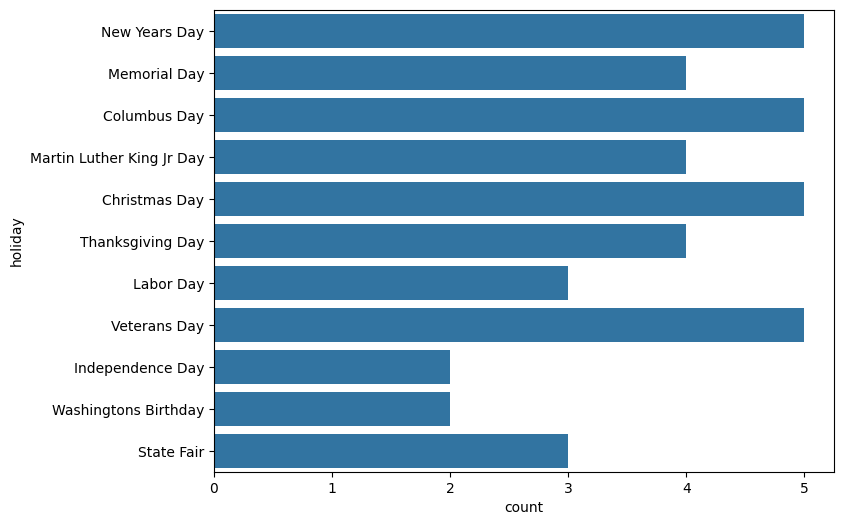

In [117]:
holidays = df.loc[df.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

**Visualization of the feature-'holiday' category distribution in the dataset after excluding 'None'**

<Axes: xlabel='count', ylabel='weather_main'>

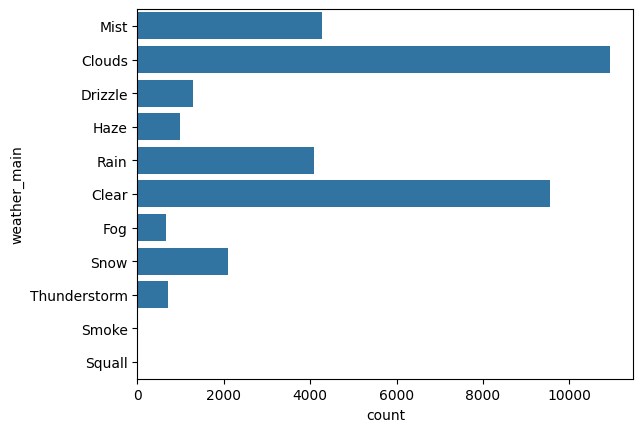

In [118]:
sns.countplot(y='weather_main', data=df)

**Visualization of the feature - 'weather_main' category distribution in the dataset**

In [119]:
df_num_features = df[['temp','clouds_all','rain_1h','snow_1h','traffic_volume']]
df_corr = df_num_features.corr()
df_corr['traffic_volume']

temp              0.126492
clouds_all        0.067152
rain_1h          -0.020712
snow_1h          -0.003461
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

**As we can see in the initial dataset, we do not have much correlations with the target variable**

<Axes: >

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'temp'),
  Text(1.5, 0, 'clouds_all'),
  Text(2.5, 0, 'rain_1h'),
  Text(3.5, 0, 'snow_1h'),
  Text(4.5, 0, 'traffic_volume')])

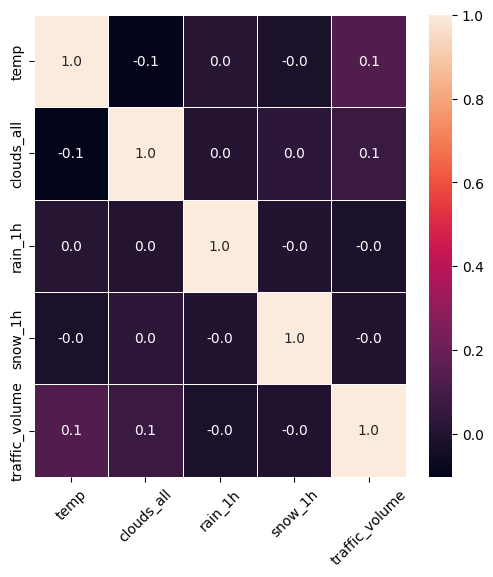

In [120]:
# how ever let us visualize these correlations

fig, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(df_corr, annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.xticks(rotation =45)
plt.show()

### Bivariate Analysis

<Figure size 2000x800 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: xlabel='clouds_all', ylabel='traffic_volume'>

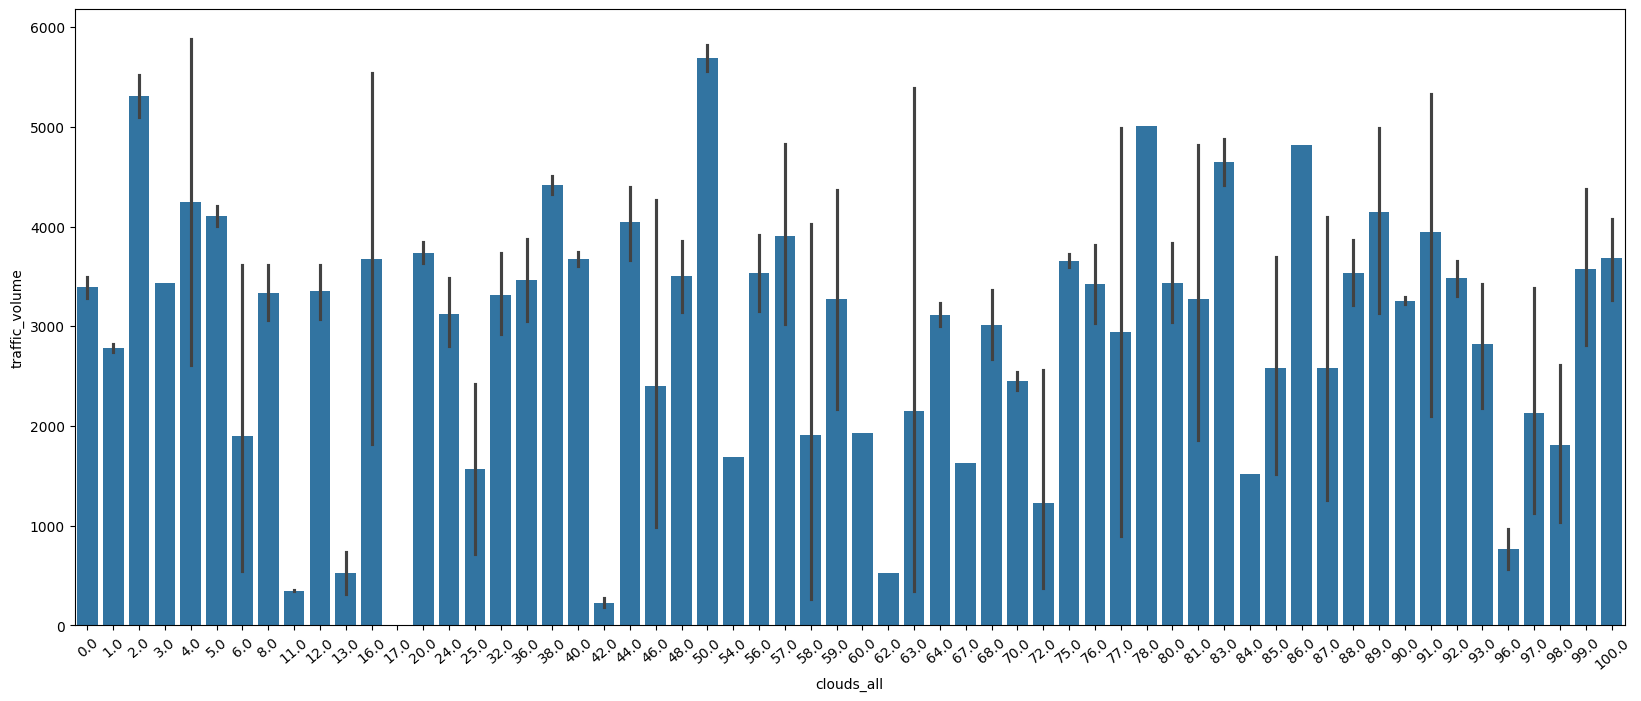

In [121]:
plt.figure(figsize=(20,8))
plt.xticks(rotation =40)
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df)
# plt.xticks(rotation =40)
plt.show()

**very inconsistent distribution of traffic volume in relation to 'clouds_all' feature**

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='temp', ylabel='traffic_volume'>

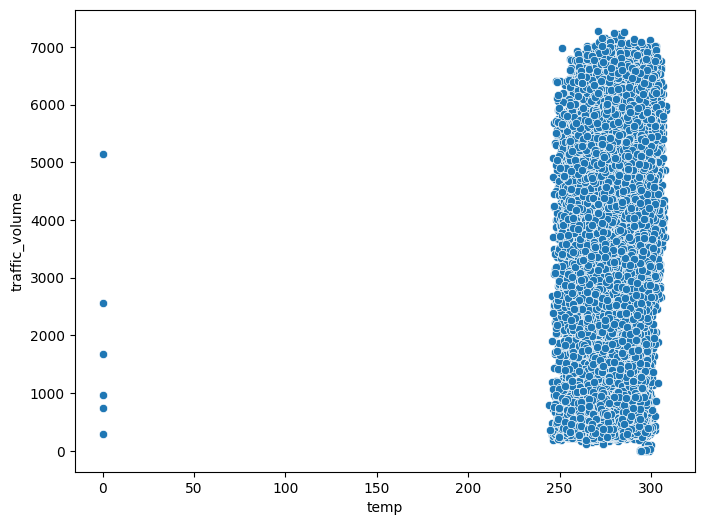

In [122]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = df)

<Figure size 600x600 with 0 Axes>

<Axes: xlabel='weather_main', ylabel='traffic_volume'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Mist'),
  Text(1, 0, 'Clouds'),
  Text(2, 0, 'Drizzle'),
  Text(3, 0, 'Haze'),
  Text(4, 0, 'Rain'),
  Text(5, 0, 'Clear'),
  Text(6, 0, 'Fog'),
  Text(7, 0, 'Snow'),
  Text(8, 0, 'Thunderstorm'),
  Text(9, 0, 'Smoke'),
  Text(10, 0, 'Squall')])

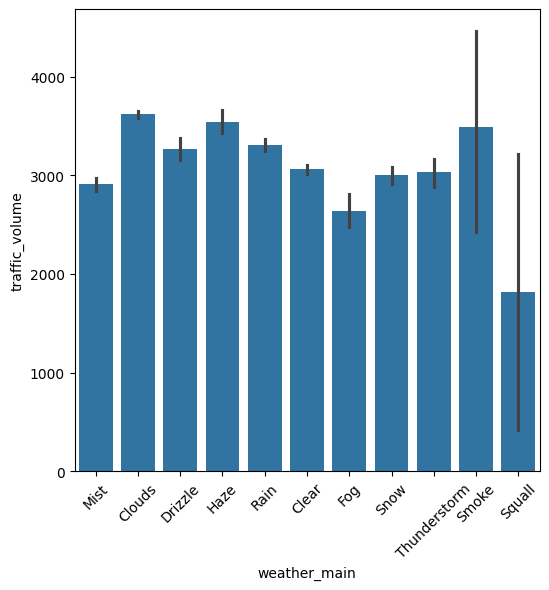

In [123]:
plt.figure(figsize=(6,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df)
plt.xticks(rotation = 45)
plt.show()

**Note the high variation in the confidence intervals for the smoke and squall categories**

<Figure size 1200x1200 with 0 Axes>

<Axes: xlabel='traffic_volume', ylabel='weather_description'>

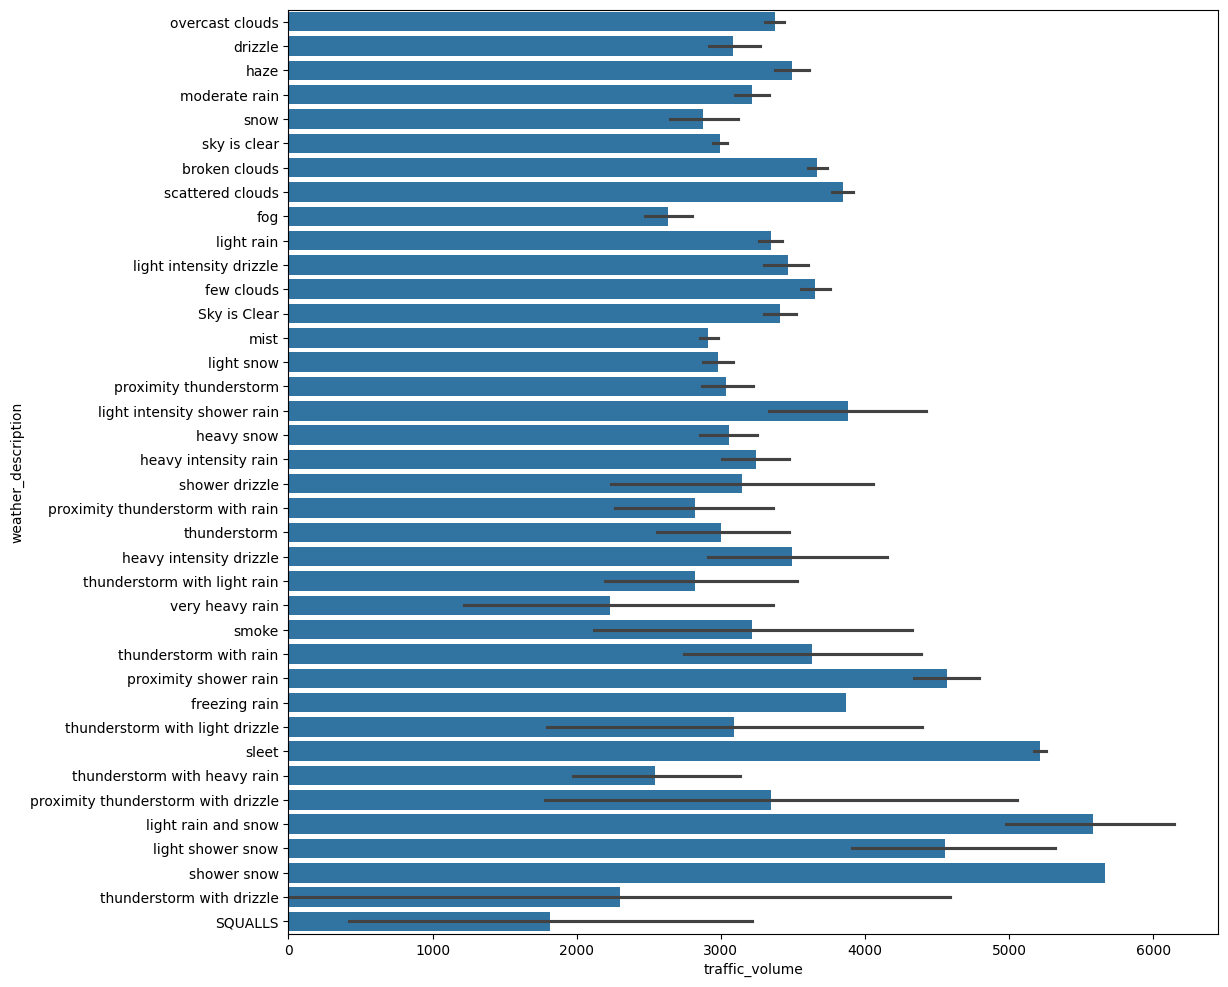

In [124]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,12))
sns.barplot(y='weather_description', x = 'traffic_volume', data = df)
plt.show()

### Data Cleaning and Pre processing

**Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation**

In [125]:

data = df.copy(deep = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       34748 non-null  float64
 1   holiday              42 non-null     object 
 2   temp                 34754 non-null  float64
 3   rain_1h              34860 non-null  float64
 4   snow_1h              34733 non-null  float64
 5   clouds_all           34659 non-null  float64
 6   weather_main         34654 non-null  object 
 7   weather_description  34751 non-null  object 
 8   date_time            34683 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


In [126]:
data.ffill(inplace = True)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       38563 non-null  float64
 1   holiday              37589 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  float64
 6   weather_main         38563 non-null  object 
 7   weather_description  38562 non-null  object 
 8   date_time            38563 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.6+ MB


**Removing Duplicate Rows**

In [128]:
data.shape

(38563, 9)

In [129]:
data.drop_duplicates(inplace = True)

In [130]:
data.shape

(38560, 9)

**Since we have already seen poor reperesentation of 'snow_1h' and 'rain_1h', and similarity between weather_main and  'weather_description' we will drop the three features for the model**

In [131]:
data1 = data.drop(['snow_1h', 'rain_1h','weather_description'] , axis =1)

In [132]:
data1.head()

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time
0,1493.0,NaN,287.15,90.0,Mist,18-09-2017 22:00
1,1493.0,NaN,282.25,90.0,Clouds,23-05-2013 11:00
2,1493.0,NaN,282.25,90.0,Drizzle,04-06-2016 01:00
3,5626.0,NaN,252.08,20.0,Haze,04-01-2017 08:00
4,5357.0,NaN,291.25,20.0,Rain,13-06-2013 13:00


**converting 'holiday' feature into just holiday and 'unknown'**

In [133]:
data1['holiday'] = data1['holiday'].apply(lambda x: 'unknown' if pd.isna(x) else 'holiday' )

In [134]:
data1.head()

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time
0,1493.0,unknown,287.15,90.0,Mist,18-09-2017 22:00
1,1493.0,unknown,282.25,90.0,Clouds,23-05-2013 11:00
2,1493.0,unknown,282.25,90.0,Drizzle,04-06-2016 01:00
3,5626.0,unknown,252.08,20.0,Haze,04-01-2017 08:00
4,5357.0,unknown,291.25,20.0,Rain,13-06-2013 13:00


**Next we extract the date, hour, etc from the 'date_time'feature, by first converting it into a pandas datetime object**

In [135]:
data1['date_time'] = pd.to_datetime(data1['date_time'], format = '%d-%m-%Y %H:%M')

In [136]:
data1['date_time'].head()

0   2017-09-18 22:00:00
1   2013-05-23 11:00:00
2   2016-06-04 01:00:00
3   2017-01-04 08:00:00
4   2013-06-13 13:00:00
Name: date_time, dtype: datetime64[ns]

**Next we extract the 'year', 'month', 'weekday' and 'hour' from the 'date_time' feature**

In [137]:
data1['year'] = data1['date_time'].dt.year
data1['month'] = data1['date_time'].dt.month
data1['weekday'] = data1['date_time'].dt.weekday
data1['hour'] = data1['date_time'].dt.hour

In [138]:
data1.shape
data1.head()

(38560, 10)

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time,year,month,weekday,hour
0,1493.0,unknown,287.15,90.0,Mist,2017-09-18 22:00:00,2017,9,0,22
1,1493.0,unknown,282.25,90.0,Clouds,2013-05-23 11:00:00,2013,5,3,11
2,1493.0,unknown,282.25,90.0,Drizzle,2016-06-04 01:00:00,2016,6,5,1
3,5626.0,unknown,252.08,20.0,Haze,2017-01-04 08:00:00,2017,1,2,8
4,5357.0,unknown,291.25,20.0,Rain,2013-06-13 13:00:00,2013,6,3,13


**Next we will now divide the 24 hours of the day into before_sunrise, after_sunrise, afternoon and night categories**

In [139]:
data1['hour'].unique()

array([22, 11,  1,  8, 13, 20, 23, 10,  5, 16, 18,  0, 14,  9, 21, 19,  4,
        6, 15,  7,  2, 17,  3, 12], dtype=int32)

In [140]:
# we will create a function ,which will split the hours into the 4 categories
def day_category(hour):
  day_section = ''
  if hour in [1,2,3,4,5]:
    day_section = 'before_sunrise'
  elif hour in [6,7,8,9,10,11,12]:
    day_section = 'after_sunrise'
  elif hour in [13,14, 15, 16, 17, 18]:
    day_section = 'evening'
  else :
    day_section = 'night'
  return day_section

In [141]:
data1['day_section'] = data1['hour'].map(day_category)

In [142]:
data1.shape
data1.head()

(38560, 11)

,traffic_volume,holiday,temp,clouds_all,weather_main,date_time,year,month,weekday,hour,day_section
0,1493.0,unknown,287.15,90.0,Mist,2017-09-18 22:00:00,2017,9,0,22,night
1,1493.0,unknown,282.25,90.0,Clouds,2013-05-23 11:00:00,2013,5,3,11,after_sunrise
2,1493.0,unknown,282.25,90.0,Drizzle,2016-06-04 01:00:00,2016,6,5,1,before_sunrise
3,5626.0,unknown,252.08,20.0,Haze,2017-01-04 08:00:00,2017,1,2,8,after_sunrise
4,5357.0,unknown,291.25,20.0,Rain,2013-06-13 13:00:00,2013,6,3,13,evening


**Next we use the pd.get_dummies function to do one hot encoding of the categorical features 'holiday', 'weather_main' and day section**

In [143]:
data1 = pd.get_dummies(data1, columns =['holiday', 'weather_main','day_section'])

In [144]:
data1.shape
data1.head()

(38560, 25)

,traffic_volume,temp,clouds_all,date_time,year,month,weekday,hour,holiday_holiday,holiday_unknown,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,day_section_after_sunrise,day_section_before_sunrise,day_section_evening,day_section_night
0,1493.0,287.15,90.0,2017-09-18 22:00:00,2017,9,0,22,False,True,...,True,False,False,False,False,False,False,False,False,True
1,1493.0,282.25,90.0,2013-05-23 11:00:00,2013,5,3,11,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1493.0,282.25,90.0,2016-06-04 01:00:00,2016,6,5,1,False,True,...,False,False,False,False,False,False,False,True,False,False
3,5626.0,252.08,20.0,2017-01-04 08:00:00,2017,1,2,8,False,True,...,False,False,False,False,False,False,True,False,False,False
4,5357.0,291.25,20.0,2013-06-13 13:00:00,2013,6,3,13,False,True,...,False,True,False,False,False,False,False,False,True,False


**Next we set the column 'date_time' as index**

In [145]:
data1.set_index('date_time',inplace = True)

In [146]:
data1.shape
data1.head()

(38560, 24)

,traffic_volume,temp,clouds_all,year,month,weekday,hour,holiday_holiday,holiday_unknown,weather_main_Clear,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,day_section_after_sunrise,day_section_before_sunrise,day_section_evening,day_section_night
date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-18 22:00:00,1493.0,287.15,90.0,2017,9,0,22,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2013-05-23 11:00:00,1493.0,282.25,90.0,2013,5,3,11,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2016-06-04 01:00:00,1493.0,282.25,90.0,2016,6,5,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2017-01-04 08:00:00,5626.0,252.08,20.0,2017,1,2,8,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2013-06-13 13:00:00,5357.0,291.25,20.0,2013,6,3,13,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [147]:
target = data1['traffic_volume']
target.shape
target.head()

(38560,)

date_time
2017-09-18 22:00:00    1493.0
2013-05-23 11:00:00    1493.0
2016-06-04 01:00:00    1493.0
2017-01-04 08:00:00    5626.0
2013-06-13 13:00:00    5357.0
Name: traffic_volume, dtype: float64

In [148]:
data1.shape

(38560, 24)

In [149]:
data1.head()

,traffic_volume,temp,clouds_all,year,month,weekday,hour,holiday_holiday,holiday_unknown,weather_main_Clear,...,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,day_section_after_sunrise,day_section_before_sunrise,day_section_evening,day_section_night
date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-18 22:00:00,1493.0,287.15,90.0,2017,9,0,22,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2013-05-23 11:00:00,1493.0,282.25,90.0,2013,5,3,11,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2016-06-04 01:00:00,1493.0,282.25,90.0,2016,6,5,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2017-01-04 08:00:00,5626.0,252.08,20.0,2017,1,2,8,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2013-06-13 13:00:00,5357.0,291.25,20.0,2013,6,3,13,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [150]:
x = data1.iloc[:,1:]

In [151]:
x.shape

(38560, 23)

In [152]:
x.describe()

,temp,clouds_all,year,month,weekday,hour
count,38560.000000,38560.000000,38560.000000,38560.000000,38560.000000,38560.000000
mean,281.158638,49.480654,2015.514601,6.483610,2.982080,11.414004
std,13.811096,39.023601,1.894312,3.405509,2.009654,6.947594
min,0.000000,0.000000,2012.000000,1.000000,0.000000,0.000000
25%,272.180000,1.000000,2014.000000,4.000000,1.000000,5.000000
50%,282.450000,64.000000,2016.000000,7.000000,3.000000,11.000000
75%,291.770000,90.000000,2017.000000,9.000000,5.000000,17.250000
max,308.430000,100.000000,2018.000000,12.000000,6.000000,23.000000


In [153]:
corr_data1 = data1.corr()

In [154]:
corr_data1['traffic_volume']

traffic_volume                1.000000
temp                          0.097496
clouds_all                    0.052772
year                          0.002055
month                        -0.002565
weekday                      -0.124969
hour                          0.284311
holiday_holiday               0.007049
holiday_unknown              -0.007049
weather_main_Clear           -0.052074
weather_main_Clouds           0.098754
weather_main_Drizzle         -0.000133
weather_main_Fog             -0.032620
weather_main_Haze             0.022711
weather_main_Mist            -0.051218
weather_main_Rain             0.008575
weather_main_Smoke            0.000544
weather_main_Snow            -0.026031
weather_main_Squall          -0.001758
weather_main_Thunderstorm    -0.011520
day_section_after_sunrise     0.317302
day_section_before_sunrise   -0.522354
day_section_evening           0.415359
day_section_night            -0.250242
Name: traffic_volume, dtype: float64

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: >

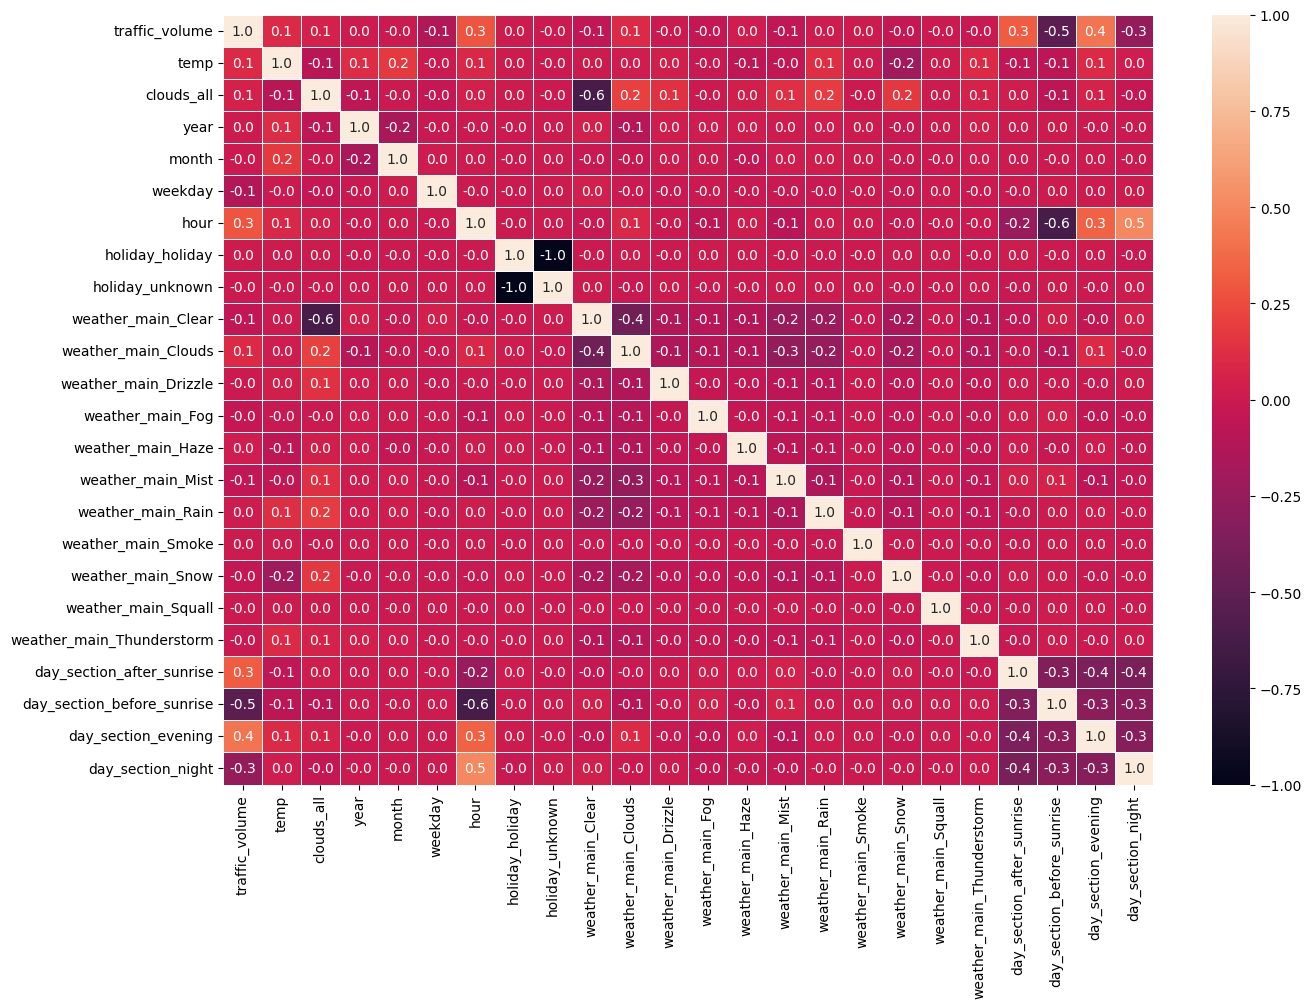

In [155]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.xticks(rotation =45)
sns.heatmap(corr_data1, annot = True, linewidths = .5, fmt = '.1f', ax = ax)
plt.show()

**Visualization of Correlation after feature engineering**

**We can see that there is a negative correlation between day_section_before_sunrise and traffic_volume and  hour features**

### Feature Importance and Selection using Random Forest Regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
regr = RandomForestRegressor(random_state = 32)

In [158]:
regr.fit(x, target)

RandomForestRegressor(random_state=32)

In [159]:
regr.feature_importances_

array([1.51688903e-01, 3.79556869e-02, 3.85824698e-02, 5.50141105e-02,
       9.54707841e-02, 5.07819330e-01, 1.82851618e-03, 1.85859156e-03,
       7.46767770e-03, 8.94384971e-03, 3.74303765e-03, 3.46989415e-03,
       3.03187096e-03, 8.73751468e-03, 7.18992461e-03, 1.15319125e-05,
       4.70628212e-03, 1.36282205e-05, 2.56682485e-03, 5.69377977e-04,
       3.00604335e-04, 6.27981252e-04, 5.84016077e-02])

Text(0.5, 1.0, 'Feature Importance')

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7fb0ae831f90>,
 [Text(0, 0, 'weather_main_Clear'),
  Text(0, 1, 'weather_main_Mist'),
  Text(0, 2, 'weather_main_Clouds'),
  Text(0, 3, 'clouds_all'),
  Text(0, 4, 'year'),
  Text(0, 5, 'month'),
  Text(0, 6, 'day_section_night'),
  Text(0, 7, 'weekday'),
  Text(0, 8, 'temp'),
  Text(0, 9, 'hour')])

Text(0.5, 0, ' Importance')

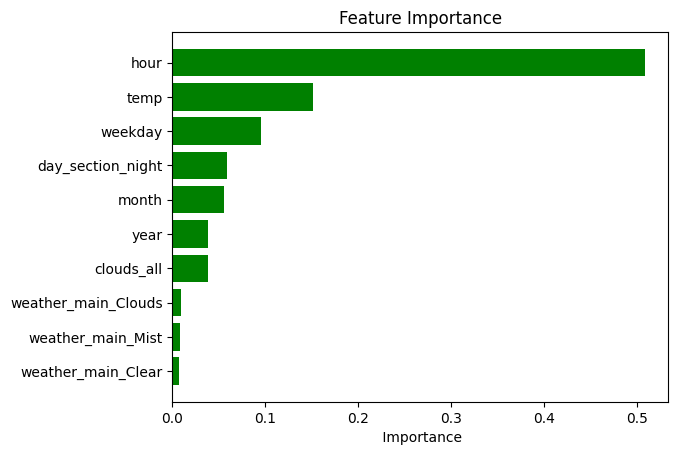

In [160]:
features = x.columns
importance = regr.feature_importances_
indices = np.argsort(importance)[-10:] # Top 10 features
plt.title('Feature Importance' )
plt.barh(range(len(indices)), importance[indices], color= 'green', align = 'center')
plt.yticks(range(len(indices)), [features[feature] for feature in indices])
plt.xlabel(' Importance')
plt.show()

**Top Ten features extracted as per importance**

### Model Development

**selecting the top 7 important features selected by Random Forests**

In [161]:
important_features = [ 'hour','temp','weekday','day_section_night','month', 'year','clouds_all']

**Splitting the dataset into training and validation set. This validation set is to test our model internally before submitting it to the test set**

*Note : we have already been provided the test data set for the hackathon*

In [162]:
# Train and  validation Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x[important_features],target,test_size=0.30,random_state=32)
x_train.head()

,hour,temp,weekday,day_section_night,month,year,clouds_all
date_time,,,,,,,
2015-12-13 08:00:00,8,276.87,6,False,12,2015,90.0
2013-02-08 04:00:00,4,268.87,4,False,2,2013,90.0
2015-12-16 02:00:00,2,274.22,2,False,12,2015,90.0
2018-05-08 12:00:00,12,293.44,1,False,5,2018,40.0
2013-11-13 00:00:00,0,267.69,2,True,11,2013,64.0


**Scaling**

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scale = StandardScaler()

In [165]:
scale.fit(x_train)

StandardScaler()

In [166]:
x_train_scaled = scale.transform(x_train)

In [167]:
x_test_scaled = scale.transform(x_test)

In [168]:
x_train_scaled

array([[-0.48729597, -0.3041294 ,  1.50128957, ...,  1.62094387,
        -0.27164543,  1.04673561],
       [-1.06350996, -0.8721491 ,  0.50704782, ..., -1.31613687,
        -1.32603908,  1.04673561],
       [-1.35161695, -0.49228593, -0.48719393, ...,  1.62094387,
        -0.27164543,  1.04673561],
       ...,
       [ 1.6735065 ,  0.48541797, -1.48143568, ..., -0.72872072,
        -1.32603908,  1.04673561],
       [ 0.23297152,  0.92279313,  0.00992695, ...,  0.73981965,
        -1.32603908,  0.38064683],
       [ 0.95323901,  1.52915416,  1.50128957, ..., -0.14130457,
         0.25555139, -0.74658032]])

**Experimenting with different models**

In [169]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV



In [170]:
def model_training(models,model_names, x_train_scaled, x_test_scaled, y_train, y_test):
    r2_stats = []
    mse_stats = []
    for model in range(len(models)):
        regressor = models[model]
        regressor.fit(x_train_scaled, y_train)
        y_pred = regressor.predict(x_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test,y_pred)
        r2_stats.append(r2)
        mse_stats.append(mse)


    result_df = pd.DataFrame(list(zip(model_names, r2_stats, mse_stats)), columns = ['Model', 'R2_Score','MSE'])
    return result_df

In [171]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SVR(), XGBRegressor(),HistGradientBoostingRegressor(), RandomForestRegressor(), KNeighborsRegressor(), DecisionTreeRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'XGB Regressor','Hist Gradient Boost Regressor', 'Random Forest Regressor', 'K Neighbors Regressor', 'Decision Tree Regressor']


In [172]:
result = model_training(models,model_names, x_train_scaled, x_test_scaled, y_train, y_test)

In [173]:
result

,Model,R2_Score,MSE
0,Linear Regression,0.303770,2.746877e+06
1,Ridge Regression,0.303770,2.746876e+06
2,Lasso Regression,0.303735,2.747015e+06
3,ElasticNet Regression,0.232169,3.029368e+06
4,SVR,0.243790,2.983518e+06
5,XGB Regressor,0.621750,1.492332e+06
6,Hist Gradient Boost Regressor,0.636569,1.433866e+06
7,Random Forest Regressor,0.596492,1.591985e+06
8,K Neighbors Regressor,0.524070,1.877714e+06
9,Decision Tree Regressor,0.274311,2.863101e+06


**selecting the best model**

In [174]:
regrh = HistGradientBoostingRegressor(random_state=32)
regrh.fit(x_train_scaled, y_train)
y_pred = regrh.predict(x_test_scaled)
print(f"r2 score : {r2_score(y_test, y_pred)} \n mean squared error : {mean_squared_error(y_test, y_pred)} \n mean absolute error : {mean_absolute_error(y_test,y_pred)} ")

HistGradientBoostingRegressor(random_state=32)

r2 score : 0.6364359368615629 
 mean squared error : 1434390.0557400663 
 mean absolute error : 747.3131695130902 


### Testing and Creating Output CSV

In [175]:
test_pd = pd.read_csv('/content/test_set_nogt.csv')
test = test_pd.copy(deep=True)

In [176]:
final_test = test.drop(['snow_1h', 'rain_1h','weather_description'] , axis =1)

In [177]:
final_test['holiday'] = final_test['holiday'].apply(lambda x: 'unknown' if pd.isna(x) else 'holiday' )

In [178]:
final_test['date_time'] = pd.to_datetime(final_test['date_time'], format = '%d-%m-%Y %H:%M')

In [179]:
final_test['year'] = final_test['date_time'].dt.year
final_test['month'] = final_test['date_time'].dt.month
final_test['weekday'] = final_test['date_time'].dt.weekday
final_test['hour'] =final_test['date_time'].dt.hour

In [180]:
final_test['hour'].unique()

array([11, 12, 13, 14,  2,  8, 17, 21,  0,  1, 16,  3,  6,  7, 18,  9, 19,
       22,  4, 23,  5, 15, 20, 10], dtype=int32)

In [181]:
final_test['day_section'] = final_test['hour'].map(day_category)

In [182]:
final_test = pd.get_dummies(final_test, columns =['holiday', 'weather_main','day_section'])

In [183]:
final_test.set_index('date_time',inplace = True)

In [188]:
final_test= final_test[important_features]


In [189]:
scale_test = StandardScaler()

In [190]:
scale_test.fit(final_test)

StandardScaler()

In [191]:
test_scaled = scale_test.transform(final_test)

In [ ]:
y_pred = regrh.predict(test_scaled)

In [ ]:
submission = pd.DataFrame({'ID': test_pd.index, 'traffic_volume' : y_pred})
submission.to_csv('submission.csv', index=False)